In [2]:
from sklearn import datasets, neighbors, metrics, grid_search, cross_validation
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)

In [20]:
irisdf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target ctarget  predictions  
0       0       r            0  
1       0       r            0  
2       0       r            0  
3       0       r            0  
4       0       r            0

## Build your own Classifier 

1. Plot the flowers below and then find natural cut points. Where could you divide your plot to create a classifier?

Axes(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


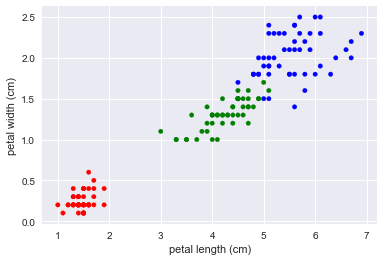

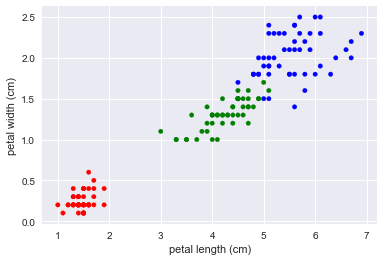

In [5]:
#plotting
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()



2 Using those cutpoints create a function to classify the flowers

In [6]:
def my_classifier(row):
    red_row = []
    blue_row = []
    green_row = []
    for i in row:
        if (i >= 1 and i <= 2):
            red_row.append("%.2f" %i)
        elif (i >= 3 and i < 5):
            green_row.append("%.2f" %i)
        elif (i >=5 and i < 7):
            blue_row.append("%.2f" %i)
    print("Red Row: ", red_row)
    print("Blue_row: ", blue_row)
    print("Green Row: ", green_row)

my_classifier(irisdf["petal length (cm)"])


('Red Row: ', ['1.40', '1.40', '1.30', '1.50', '1.40', '1.70', '1.40', '1.50', '1.40', '1.50', '1.50', '1.60', '1.40', '1.10', '1.20', '1.50', '1.30', '1.40', '1.70', '1.50', '1.70', '1.50', '1.00', '1.70', '1.90', '1.60', '1.60', '1.50', '1.40', '1.60', '1.60', '1.50', '1.50', '1.40', '1.50', '1.20', '1.30', '1.50', '1.30', '1.50', '1.30', '1.30', '1.30', '1.60', '1.90', '1.40', '1.60', '1.40', '1.50', '1.40'])
('Blue_row: ', ['5.00', '5.10', '6.00', '5.10', '5.90', '5.60', '5.80', '6.60', '6.30', '5.80', '6.10', '5.10', '5.30', '5.50', '5.00', '5.10', '5.30', '5.50', '6.70', '6.90', '5.00', '5.70', '6.70', '5.70', '6.00', '5.60', '5.80', '6.10', '6.40', '5.60', '5.10', '5.60', '6.10', '5.60', '5.50', '5.40', '5.60', '5.10', '5.10', '5.90', '5.70', '5.20', '5.00', '5.20', '5.40', '5.10'])
('Green Row: ', ['4.70', '4.50', '4.90', '4.00', '4.60', '4.50', '4.70', '3.30', '4.60', '3.90', '3.50', '4.20', '4.00', '4.70', '3.60', '4.40', '4.50', '4.10', '4.50', '3.90', '4.80', '4.00', '4.90'

In [7]:
def myclassifier_1(row):
    for i in row:
        if (i > 0 and i < 2):
            return 0
        elif (i >= 2 and i <= 4.75):
            return 1
        elif (i > 4.75 and i < 10):
            return 2
    
myclassifier_1(irisdf["petal length (cm)"])

0

In [8]:
irisdf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target ctarget  
0       0       r  
1       0       r  
2       0       r  
3       0       r  
4       0       r

In [9]:
predictions = irisdf.apply(myclassifier_1, axis = 1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.333333333333


### Starter Code

Work on improving the classifier below.


In [22]:
def my_classifier2(row):
    if (row["petal length (cm)"] < 2):
        return 0
    elif (row["petal length (cm)"] <= 4.75):
        return 1
    elif (row["petal length (cm)"] < 7):
        return 2


In [23]:
predictions = irisdf.apply(my_classifier2, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.953333333333


#### Using distance: KNN implementation. n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#this prints our predicted values
print knn.predict(iris.data[:,2:])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
#this prints the real values (flower types)
# info on target: http://scikit-learn.org/stable/datasets/index.html
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#accuracy 
print knn.score(iris.data[:,2:], iris.target)

0.96


### Question: Do we see a change in performance when using the "distance" weight?

Yes. The accuracy improved slightly, but it was enough of a change to become nearly perfect.

In [28]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7 , weights = "distance") 
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333
